# Comunicações e Processamento de Sinal (CPS)
## Semana 2 
## Modulação em Amplitude (Sinais Analógicos)
https://en.wikipedia.org/wiki/Amplitude_modulation

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Leitura de um sinal

In [343]:
fs, dados = wavfile.read('FalaSala.wav')

C:\Users\tiago\AppData\Local\Temp\ipykernel_10064\1718529783.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados = wavfile.read('FalaSala.wav')


In [344]:
dados.dtype

dtype('int16')

In [345]:
len(dados)

340480

In [346]:
fs

48000

In [347]:
t = np.arange(0,len(dados)/fs-1/fs,1/fs)
len(t)

340480

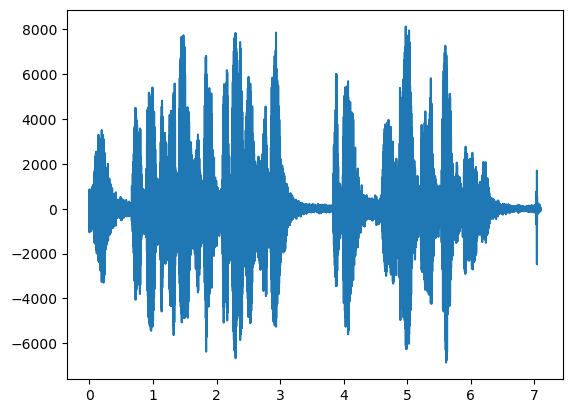

In [348]:
plt.plot(t,dados) #t e dados não tinham o mesmo tamanho (começa em zero - optamos por retirar do t um dos pontos)

## Espectro

In [350]:
X = np.fft.fft(dados)/len(dados)

In [351]:
f = np.arange(len(X), dtype = 'float')*fs/len(X)

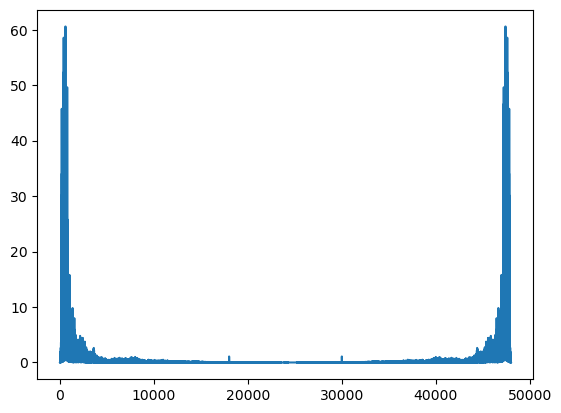

In [352]:
plt.plot(f, np.abs(X))

## Desenho de um filtro passa baixo (FIR)

In [354]:
from scipy import signal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

In [356]:
fc = 8000 # frequencia de corte do filtro
numtaps = 101 # numero de coeficientes
bk = signal.firwin(numtaps, fc, fs=fs)  # cria um filtro FIR passa baixo

In [357]:
f1, H1 = signal.freqz(bk, fs = fs) # calcular a resposta em frequencia - H(w)

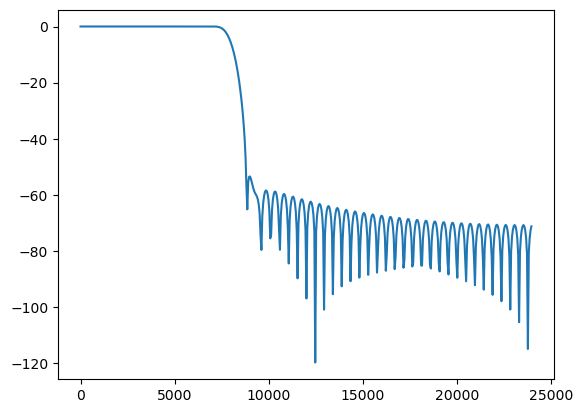

In [358]:
#plt.plot(f1, np.abs(H1)) # visualizacao do modulo da resposta em frequencia |H(w)|
plt.plot(f1, 20*np.log10(np.abs(H1))) # visualizacao do modulo da resposta em frequencia |H(w)|dB

## Filtragem

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [360]:
y = signal.lfilter(bk, [1], dados)

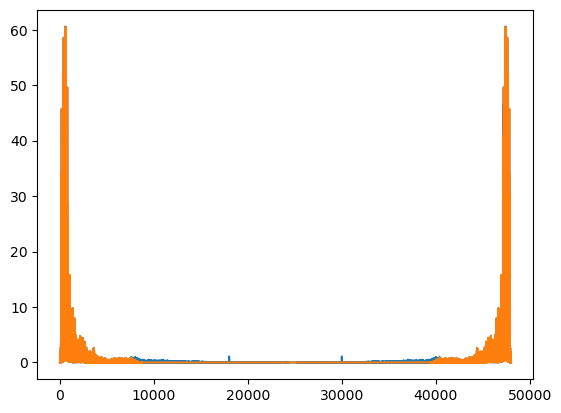

In [361]:
Y = np.fft.fft(y)/len(y)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
#plt.axis([0,10000, 0,70])

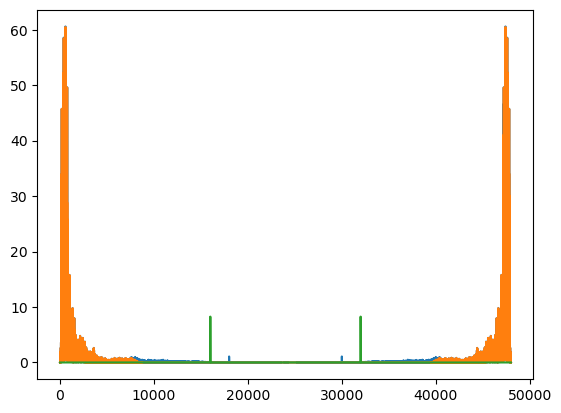

In [362]:
portadora = 20* np.cos(2*np.pi*16000*t)
Z = np.fft.fft(portadora)/len(portadora)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))

## Modulação

In [364]:
novoSinal = y * portadora

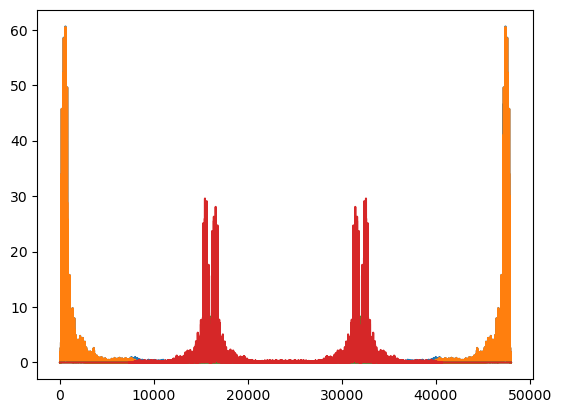

In [365]:
N = np.fft.fft(novoSinal)/len(novoSinal)/20
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))
plt.plot(f, np.abs(N))

In [366]:
from IPython.display import Audio
Audio(novoSinal, rate=fs, normalize= True)

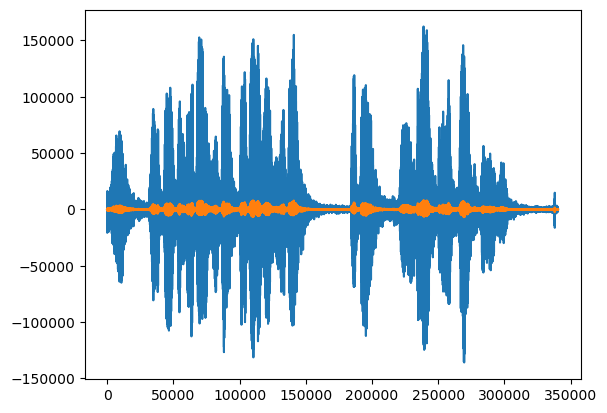

In [367]:
plt.plot(novoSinal)
plt.plot(dados)

In [368]:
novoSinal.dtype

dtype('float64')

In [369]:
print(np.max(novoSinal))
print(np.min(novoSinal))

162280.7682379325
-135793.30827163992


## deem uma vista de olhos nos datatypes do numpy:
https://numpy.org/doc/stable/user/basics.types.html

In [371]:
novoSinal2 = novoSinal/np.max(novoSinal) * 2**15

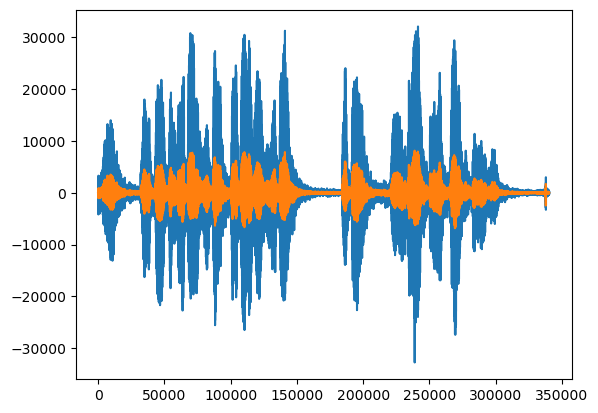

In [372]:
plt.plot(novoSinal2.astype('int16'))
plt.plot(dados)

# Criação de Filtro Passa Alto

In [374]:
fc = 8000 # frequencia de corte do filtro
numtaps = 101 # numero de coeficientes
bk_hp = signal.firwin(numtaps, fc, fs=fs, pass_zero = 'highpass')  # 

In [375]:
f1, H1 = signal.freqz(bk_hp, fs = fs) # calcular a resposta em frequencia - H(w)

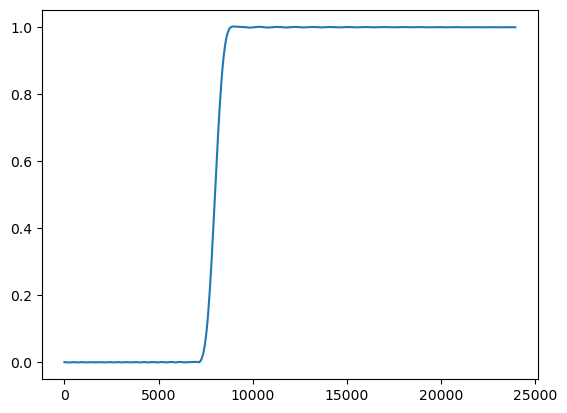

In [376]:
plt.plot(f1,np.abs(H1))

In [377]:
y_novo = signal.lfilter(bk_hp, [1], novoSinal2)

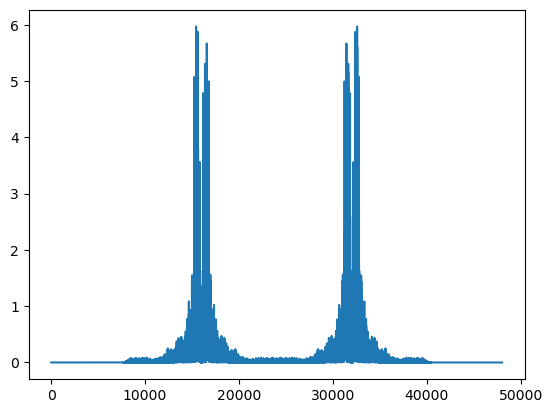

In [378]:
NN = np.fft.fft(y_novo)/len(y_novo)/20
plt.plot(f, np.abs(NN))

In [379]:
SinalQuaseFinal = y_novo * portadora
SinalFinal = signal.lfilter(bk, [1], SinalQuaseFinal)

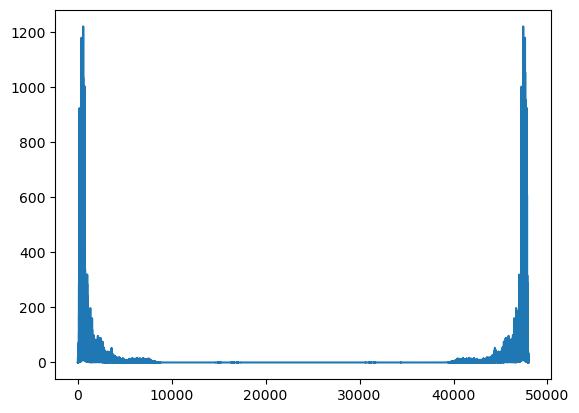

In [380]:
NNN = np.fft.fft(SinalFinal)/len(SinalFinal)
plt.plot(f, np.abs(NNN))

In [381]:
Audio(SinalFinal, rate=fs, normalize= True)